### COMP 4447
### Final Project
### Robert McLellan & Jonathan Yun

## Motivation
•	Dataset and motivation slide (1 points)
- How/why the dataset was collected and a description of the metadata of your dataset. 

   Each year the World Health Organization (WHO) provides recommendations of the makeup of seasonal flu vaccines based on regions. The WHO informs these recommendations based on data from the WHO Global Influenza Surveillance and Response System (GISRS), a global system of public health institutions that share surveillance data of circulating viruses. For the Northern hemisphere recommendations tend to be made in February ahead of the flu season, while recommendations for the Southern hemisphere are made in September. The most recent recommendations for the Northern hemisphere were released on February 24th, 2023. 
   
   Sentinel Surveillance is a virus surveillance system used by the WHO in which data is reported from hospital networks. This provides a steady stream of consistent data to the WHO. Limitations of such systems include poor detection of rare diseases, and also a lack of data on outbreaks occuring far away from sentinel surveillance sites. 
    
    
**Metadata:**
- We obtained time series data from the WHO GISRS beginning in 1995 through February 2023. 
- Reduced dataset down to 2010 onward, only evaluating Southern Hemisphere
- Total number of datapoints in full dataset: 139510 rows × 49 columns
- Total number of datapoints in reduced (Southern Hemisphere) dataset: 20439 rows × 49 columns
- Definitions of all variables in dataset: 

## Research Question
•	Actual task definition/research question (2 points) 
- What real-world problem are you trying to solve? What are the input and output of your analysis? 

Research Question: Our client has asked us to look into the WHO's annual flu vaccine makeup. We aim to give a recommendation on the makeup of the annual flu vaccine by analyzing influenza data provided by the WHO. We hope our recommedation aligns with the WHO recommendation, and will explore why it does/does not.
We will be looking to investigate influenza data and determine which strands of the flu are most prevalent. We well then look into the vaccination of the influenza and based of our analysis will determine which vaccines should be recommended.

**Input:**
- Time series data collected from the WHO Global Influenza Surveillance and Response System (GISRS)
- WHO 2023 vaccine makeup recommendation for the Southern Hemisphere: https://www.who.int/publications/m/item/recommended-composition-of-influenza-virus-vaccines-for-use-in-the-2023-southern-hemisphere-influenza-season

**Output:**
- Recommendation of the annual vaccine makeup, comparison to the actual recommendation


**WHO recommendation:**

"It is recommended that quadrivalent vaccines for use in the 2023 southern hemisphere influenza season contain the following: 

Egg-based vaccines

• an A/Sydney/5/2021 (H1N1)pdm09-like virus;

• an A/Darwin/9/2021 (H3N2)-like virus;

• a B/Austria/1359417/2021 (B/Victoria lineage)-like virus; and

• a B/Phuket/3073/2013 (B/Yamagata lineage)-like virus.

Cell culture- or recombinant-based vaccines

• an A/Sydney/5/2021 (H1N1)pdm09-like virus;

• an A/Darwin/6/2021 (H3N2)-like virus;

• a B/Austria/1359417/2021 (B/Victoria lineage)-like virus; and

• a B/Phuket/3073/2013 (B/Yamagata lineage)-like virus."

## Literature Review
•	Literature review (2 points) 
-	What other work has been done in this area, and how is your work novel compared to others? 

- Tomic, A., Tomic, I., Dekker, C.L. et al. The FluPRINT dataset, a multidimensional analysis of the influenza vaccine imprint on the immune system. Sci Data 6, 214 (2019). https://doi.org/10.1038/s41597-019-0213-4
- Osterholm, Michael T et al. “Efficacy and effectiveness of influenza vaccines: a systematic review and meta-analysis.” The Lancet. Infectious diseases vol. 12,1 (2012): 36-44. doi:10.1016/S1473-3099(11)70295-X
- Hay, Alan J, and John W McCauley. “The WHO global influenza surveillance and response system (GISRS)-A future perspective.” Influenza and other respiratory viruses vol. 12,5 (2018): 551-557. doi:10.1111/irv.12565

In [1]:
#imports
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#import geopandas as gpd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Reading in the data 
orig_df = pd.read_csv("VIW_FNT.csv")

df = orig_df

## Data Cleaning
•	Quality of cleaning (6 points, 2 points each) 

- Data cleaning and type conversion activity. Please share anything unusual you faced during this activity. 
- What did you do about missing values and why? Handling missing values properly is very important. 
- New feature/attribute creation and data summary statistics and interpretation.

In [3]:
print(df.head())

  WHOREGION FLUSEASON HEMISPHERE           ITZ COUNTRY_CODE  \
0       AFR        NH         NH   FLU_NRT_AFR          DZA   
1       WPR        YR         NH   FLU_SE_ASIA          KHM   
2       EUR        NH         NH  FLU_CNT_ASIA          UZB   
3       AMR        YR         NH   FLU_CNT_AMC          NIC   
4       AFR        YR         NH   FLU_WST_AFR          CIV   

  COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
0                Algeria        2021-11-29      2021        48   
1               Cambodia        2015-06-15      2015        25   
2             Uzbekistan        2017-02-13      2017         7   
3              Nicaragua        2015-08-17      2015        34   
4          Côte d'Ivoire        2012-10-29      2012        44   

  MMWR_WEEKSTARTDATE  ...  PARAINFLUENZA  RHINO  RSV  OTHERRESPVIRUS  \
0         2021-11-28  ...            NaN    NaN  NaN             0.0   
1         2015-06-14  ...            NaN    NaN  NaN             NaN   
2       

In [4]:
df

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
0,AFR,NH,NH,FLU_NRT_AFR,DZA,Algeria,2021-11-29,2021,48,2021-11-28,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,DZ,202148,202148
1,WPR,YR,NH,FLU_SE_ASIA,KHM,Cambodia,2015-06-15,2015,25,2015-06-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KH,201525,201524
2,EUR,NH,NH,FLU_CNT_ASIA,UZB,Uzbekistan,2017-02-13,2017,7,2017-02-12,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,UZ,201707,201707
3,AMR,YR,NH,FLU_CNT_AMC,NIC,Nicaragua,2015-08-17,2015,34,2015-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NI,201534,201533
4,AFR,YR,NH,FLU_WST_AFR,CIV,Côte d'Ivoire,2012-10-29,2012,44,2012-10-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CI,201244,201244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139505,EUR,NH,NH,FLU_EST_EUR,ROU,Romania,2014-03-17,2014,12,2014-03-16,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,RO,201412,201412
139506,SEAR,YR,NH,FLU_SE_ASIA,THA,Thailand,2012-10-08,2012,41,2012-10-07,...,NaN,NaN,NaN,NaN,"hMPV=1, RSV=16, Adeno=4",NaN,NaN,TH,201241,201241
139507,EUR,NH,NH,FLU_SW_EUR,CHE,Switzerland,2010-03-15,2010,11,2010-03-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,201011,201011
139508,EUR,NH,NH,FLU_EST_EUR,CZE,Czechia,2000-11-13,2000,46,2000-11-12,...,NaN,NaN,NaN,NaN,NaN,NaN,Total morbidity is at seasonal level.,CZ,200046,200046


In [5]:
print(df.isnull().sum())

WHOREGION                       0
FLUSEASON                       0
HEMISPHERE                      0
ITZ                             0
COUNTRY_CODE                    0
COUNTRY_AREA_TERRITORY          0
ISO_WEEKSTARTDATE               0
ISO_YEAR                        0
ISO_WEEK                        0
MMWR_WEEKSTARTDATE              0
MMWR_YEAR                       0
MMWR_WEEK                       0
ORIGIN_SOURCE                   0
SPEC_PROCESSED_NB            7535
SPEC_RECEIVED_NB            91339
AH1N12009                   31963
AH1                         39158
AH3                         16128
AH5                         96922
AH7N9                      124926
ANOTSUBTYPED                19365
ANOTSUBTYPABLE             129546
AOTHER_SUBTYPE              99750
AOTHER_SUBTYPE_DETAILS     132922
INF_A                       10734
BVIC_2DEL                  135085
BVIC_3DEL                  136250
BVIC_NODEL                  37618
BVIC_DELUNK                134471
BYAM          

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139510 entries, 0 to 139509
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WHOREGION                139510 non-null  object 
 1   FLUSEASON                139510 non-null  object 
 2   HEMISPHERE               139510 non-null  object 
 3   ITZ                      139510 non-null  object 
 4   COUNTRY_CODE             139510 non-null  object 
 5   COUNTRY_AREA_TERRITORY   139510 non-null  object 
 6   ISO_WEEKSTARTDATE        139510 non-null  object 
 7   ISO_YEAR                 139510 non-null  int64  
 8   ISO_WEEK                 139510 non-null  int64  
 9   MMWR_WEEKSTARTDATE       139510 non-null  object 
 10  MMWR_YEAR                139510 non-null  int64  
 11  MMWR_WEEK                139510 non-null  int64  
 12  ORIGIN_SOURCE            139510 non-null  object 
 13  SPEC_PROCESSED_NB        131975 non-null  float64
 14  SPEC

### Data Cleaning

In [7]:
# selecting only data that is from a Sentinel reporting system to compare the number of nulls
#sentinel data, southern hemisphere
Sen_df = df.loc[df['ORIGIN_SOURCE'] == 'SENTINEL']
SH_Sen_DF = Sen_df.loc[Sen_df['HEMISPHERE'] == 'SH']
print(SH_Sen_DF.isnull().sum())

WHOREGION                     0
FLUSEASON                     0
HEMISPHERE                    0
ITZ                           0
COUNTRY_CODE                  0
COUNTRY_AREA_TERRITORY        0
ISO_WEEKSTARTDATE             0
ISO_YEAR                      0
ISO_WEEK                      0
MMWR_WEEKSTARTDATE            0
MMWR_YEAR                     0
MMWR_WEEK                     0
ORIGIN_SOURCE                 0
SPEC_PROCESSED_NB             0
SPEC_RECEIVED_NB           1172
AH1N12009                   238
AH1                         576
AH3                         249
AH5                        1172
AH7N9                      1172
ANOTSUBTYPED                383
ANOTSUBTYPABLE              684
AOTHER_SUBTYPE             1278
AOTHER_SUBTYPE_DETAILS     1539
INF_A                       293
BVIC_2DEL                   877
BVIC_3DEL                   962
BVIC_NODEL                  269
BVIC_DELUNK                 721
BYAM                        314
BNOTDETERMINED              379
INF_B   

In [8]:
#nonsentinel data, southern hemisphere
Nonsen_df = df.loc[df['ORIGIN_SOURCE'] == 'NONSENTINEL']
SH_Nonsen_DF = Nonsen_df.loc[Nonsen_df['HEMISPHERE'] == 'SH']
print(SH_Nonsen_DF.isnull().sum())

WHOREGION                     0
FLUSEASON                     0
HEMISPHERE                    0
ITZ                           0
COUNTRY_CODE                  0
COUNTRY_AREA_TERRITORY        0
ISO_WEEKSTARTDATE             0
ISO_YEAR                      0
ISO_WEEK                      0
MMWR_WEEKSTARTDATE            0
MMWR_YEAR                     0
MMWR_WEEK                     0
ORIGIN_SOURCE                 0
SPEC_PROCESSED_NB             0
SPEC_RECEIVED_NB           1312
AH1N12009                   462
AH1                         782
AH3                         474
AH5                        1312
AH7N9                      1312
ANOTSUBTYPED                698
ANOTSUBTYPABLE              895
AOTHER_SUBTYPE             1418
AOTHER_SUBTYPE_DETAILS     1418
INF_A                       421
BVIC_2DEL                   919
BVIC_3DEL                  1089
BVIC_NODEL                  500
BVIC_DELUNK                 807
BYAM                        625
BNOTDETERMINED              580
INF_B   

In [9]:
#not defined data, southern hemisphere
Nondef_df = df.loc[df['ORIGIN_SOURCE'] == 'NOTDEFINED']
SH_Nondef_DF = Nondef_df.loc[Nondef_df['HEMISPHERE'] == 'SH']
print(SH_Nondef_DF.isnull().sum())

WHOREGION                      0
FLUSEASON                      0
HEMISPHERE                     0
ITZ                            0
COUNTRY_CODE                   0
COUNTRY_AREA_TERRITORY         0
ISO_WEEKSTARTDATE              0
ISO_YEAR                       0
ISO_WEEK                       0
MMWR_WEEKSTARTDATE             0
MMWR_YEAR                      0
MMWR_WEEK                      0
ORIGIN_SOURCE                  0
SPEC_PROCESSED_NB            954
SPEC_RECEIVED_NB            8287
AH1N12009                   5644
AH1                         6008
AH3                         2443
AH5                         8773
AH7N9                      15168
ANOTSUBTYPED                2668
ANOTSUBTYPABLE             15899
AOTHER_SUBTYPE              9628
AOTHER_SUBTYPE_DETAILS     16464
INF_A                       1288
BVIC_2DEL                  17158
BVIC_3DEL                  17472
BVIC_NODEL                  7015
BVIC_DELUNK                17308
BYAM                        6975
BNOTDETERM

### As shown, the sentinel data has the least amount of null values

In [67]:
# tried to make a merged bar plot of all the nulls values, will revisit
merged_df = pd.merge(SH_Nondef_DF, SH_Nonsen_DF,  on='COUNTRY_CODE', suffixes=('_1', '_2'))

# Create a bar plot
merged_df.plot(kind='bar', x='COUNTRY_CODE', y=['AH1_1', 'AH1_2'], legend=False)

# Set the axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of Counts for Different Categories')

# Show the plot
plt.show()


KeyboardInterrupt: 

In [11]:
# focusing on the Sentinel Southern Hemisphere df
SH_Sen_DF

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
22,AMR,YR,SH,FLU_TRP_SAMR,ECU,Ecuador,2021-05-10,2021,19,2021-05-09,...,1.0,NaN,4.0,NaN,NaN,NaN,NaN,EC,202119,202119
114,AMR,SH,SH,FLU_TEMP_SAMR,URY,Uruguay,2022-08-01,2022,31,2022-07-31,...,1.0,9.0,6.0,3.0,NaN,NaN,NaN,UY,202231,202231
315,AMR,YR,SH,FLU_TRP_SAMR,BOL,Bolivia (Plurinational State of),2022-08-29,2022,35,2022-08-28,...,1.0,4.0,0.0,3.0,NaN,NaN,NaN,BO,202235,202235
658,AMR,SH,SH,FLU_TEMP_SAMR,URY,Uruguay,2021-09-13,2021,37,2021-09-12,...,0.0,NaN,5.0,NaN,NaN,NaN,NaN,UY,202137,202137
674,AMR,SH,SH,FLU_TEMP_SAMR,ARG,Argentina,2022-07-11,2022,28,2022-07-10,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,AR,202228,202228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139165,AMR,SH,SH,FLU_TEMP_SAMR,URY,Uruguay,2022-07-11,2022,28,2022-07-10,...,0.0,6.0,4.0,7.0,NaN,NaN,NaN,UY,202228,202228
139258,AMR,YR,SH,FLU_TRP_SAMR,BOL,Bolivia (Plurinational State of),2021-11-08,2021,45,2021-11-07,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,BO,202145,202145
139274,AMR,YR,SH,FLU_TRP_SAMR,BOL,Bolivia (Plurinational State of),2022-05-02,2022,18,2022-05-01,...,0.0,0.0,18.0,0.0,NaN,NaN,NaN,BO,202218,202218
139332,AFR,YR,SH,FLU_EST_AFR,MOZ,Mozambique,2022-10-31,2022,44,2022-10-30,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,MZ,202244,202244


In [12]:
#reducing dataset
update_sh_sen_df = SH_Sen_DF[['WHOREGION', 'COUNTRY_CODE', 'ISO_YEAR', 'ORIGIN_SOURCE', 'AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_DELUNK', 'BVIC_NODEL', 'BYAM', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV']]

In [14]:
sh_sen_df = update_sh_sen_df.sort_values(by = ['ISO_YEAR', 'COUNTRY_CODE'])

In [15]:
print(sh_sen_df.head())

     WHOREGION COUNTRY_CODE  ISO_YEAR ORIGIN_SOURCE  AH1N12009  AH1  AH3  AH5  \
1987       AMR          BOL      2020      SENTINEL        0.0  0.0  0.0  NaN   
2337       AMR          BOL      2020      SENTINEL       12.0  0.0  0.0  NaN   
2355       AMR          BOL      2020      SENTINEL        0.0  0.0  0.0  NaN   
3157       AMR          BOL      2020      SENTINEL        0.0  0.0  0.0  NaN   
5570       AMR          BOL      2020      SENTINEL        2.0  0.0  0.0  NaN   

      AH7N9  INF_A  ...  INF_B  INF_ALL  INF_NEGATIVE  ADENO  BOCA  \
1987    NaN    0.0  ...    0.0      0.0           8.0    0.0   0.0   
2337    NaN   12.0  ...    1.0     13.0          27.0    0.0   0.0   
2355    NaN    0.0  ...    0.0      0.0           2.0    0.0   0.0   
3157    NaN    0.0  ...    0.0      0.0           5.0    0.0   0.0   
5570    NaN    2.0  ...    0.0      2.0          47.0    0.0   0.0   

      HUMAN_CORONA  METAPNEUMO  PARAINFLUENZA  RHINO  RSV  
1987           0.0         0.0  

In [16]:
#reducing data by year
sh_sen_df = sh_sen_df.loc[sh_sen_df['ISO_YEAR'] >= 2010]

In [17]:
sh_sen_df

,WHOREGION,COUNTRY_CODE,ISO_YEAR,ORIGIN_SOURCE,AH1N12009,AH1,AH3,AH5,AH7N9,INF_A,...,INF_B,INF_ALL,INF_NEGATIVE,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV
1987,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,AMR,BOL,2020,SENTINEL,12.0,0.0,0.0,NaN,NaN,12.0,...,1.0,13.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2355,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3157,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,AMR,BOL,2020,SENTINEL,2.0,0.0,0.0,NaN,NaN,2.0,...,0.0,2.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64779,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,161.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0
68474,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,...,2.0,2.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0
89529,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0
98353,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [38]:
sh_sen_df.set_index('ISO_YEAR')

,WHOREGION,COUNTRY_CODE,ORIGIN_SOURCE,AH1N12009,AH1,AH3,AH5,AH7N9,INF_A,BVIC_2DEL,...,INF_B,INF_ALL,INF_NEGATIVE,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV
ISO_YEAR,,,,,,,,,,,,,,,,,,,,,
2020,AMR,BOL,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,AMR,BOL,SENTINEL,12.0,0.0,0.0,NaN,NaN,12.0,1.0,...,1.0,13.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,AMR,BOL,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,AMR,BOL,SENTINEL,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,AMR,BOL,SENTINEL,2.0,0.0,0.0,NaN,NaN,2.0,0.0,...,0.0,2.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,AFR,ZAF,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,161.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2023,AFR,ZAF,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2.0,2.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0
2023,AFR,ZAF,SENTINEL,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [34]:
#filled NaNs with the column average, likely a better way to average it by year
sh_sen_df.fillna(sh_sen_df.mean())

/var/folders/bw/j460_dvn5jd93h5rsl4ck9yr0000gn/T/ipykernel_2786/626273230.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sh_sen_df.fillna(sh_sen_df.mean())


,WHOREGION,COUNTRY_CODE,ISO_YEAR,ORIGIN_SOURCE,AH1N12009,AH1,AH3,AH5,AH7N9,INF_A,...,INF_B,INF_ALL,INF_NEGATIVE,ADENO,BOCA,HUMAN_CORONA,METAPNEUMO,PARAINFLUENZA,RHINO,RSV
1987,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2337,AMR,BOL,2020,SENTINEL,12.0,0.0,0.0,0.0,0.0,12.000000,...,1.0,13.00000,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2355,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3157,AMR,BOL,2020,SENTINEL,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5570,AMR,BOL,2020,SENTINEL,2.0,0.0,0.0,0.0,0.0,2.000000,...,0.0,2.00000,47.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64779,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,6.597913,...,0.0,8.81098,161.0,0.809195,0.260434,0.252059,1.399293,1.150402,2.145533,7.0
68474,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,6.597913,...,2.0,2.00000,185.0,0.809195,0.260434,0.252059,1.399293,1.150402,2.145533,14.0
89529,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,6.597913,...,0.0,8.81098,187.0,0.809195,0.260434,0.252059,1.399293,1.150402,2.145533,9.0
98353,AFR,ZAF,2023,SENTINEL,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,1.00000,155.0,0.809195,0.260434,0.252059,1.399293,1.150402,2.145533,20.0


In [ ]:
sh_sen_df_virus = sh_sen_df[['ISO_YEAR','AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_DELUNK', 'BVIC_NODEL', 'BYAM', 'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV']]

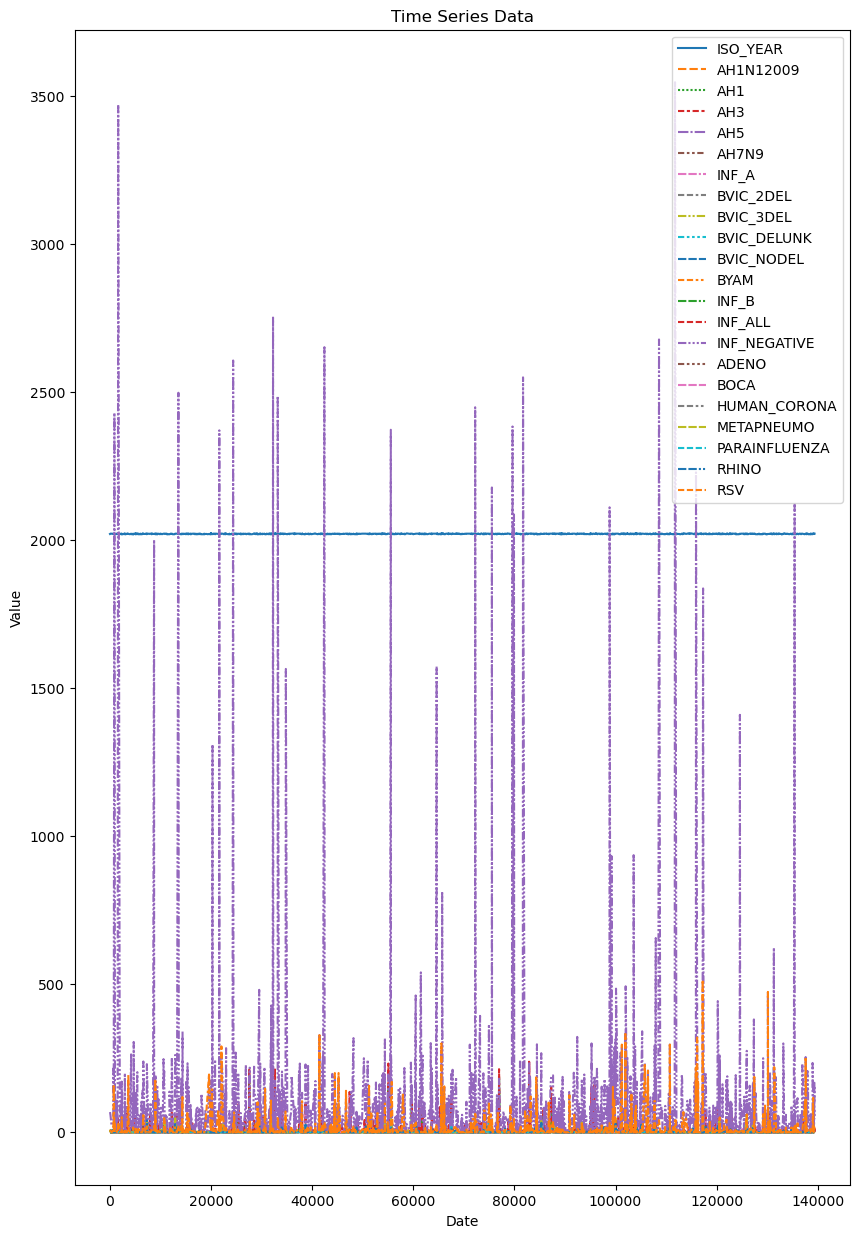

In [66]:
#let's look at a time series plot of all the viruses
plt.figure(figsize=(10,15))
sns.lineplot(data=sh_sen_df_virus, palette = 'tab10')

# Add labels and a title to the plot

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

In [ ]:
# hmm it's not plotting properly, the ISO_YEAR should be the x-axis. Also would want to retain the countries

## Visualizations
•	Visualization (8 points, 2 points each) 
- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.). 
- Describe anything you find in the data after each visualization. 
- What data visualization helped you understand about data distribution. 
- What you did about possible outlier as per data distribution visualization. (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook if you decided to remove it?) 